In [16]:
!pip install --upgrade matplotlib
!pip install -U seaborn
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2


In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid")
import json
import numpy as np

In [17]:
!pip show seaborn
!pip show matplotlib

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/andreasmotz/Developer/vod/med-chain/.venv/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/andreasmotz/Developer/vod/med-chain/.venv/lib/python3.9/site-packages
Requires: contourpy, cycler, fonttools, importlib-resources, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


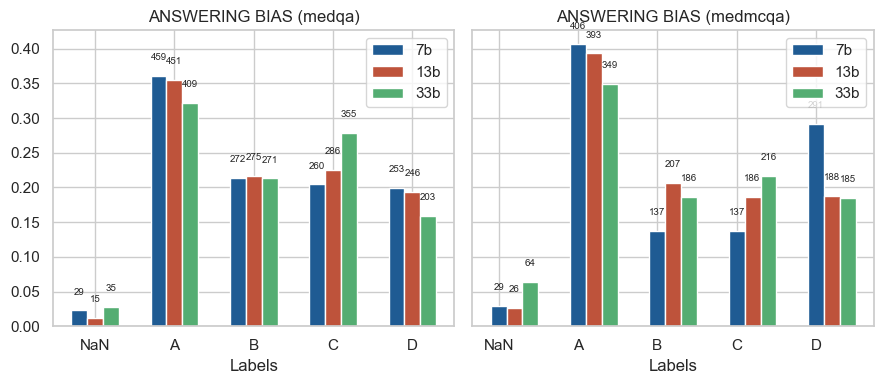

In [21]:
exp = "5-shot-cot"
date = "2023-07-04"
datadirs = {
    "medqa": {
        '7b': Path(f'~/Research/meluxina/medical-reasoning/{exp}/medqa/vicuna-7b/{date}').expanduser(),
        '13b': Path(f'~/Research/meluxina/medical-reasoning/{exp}/medqa/vicuna-13b/{date}').expanduser(),
        '33b': Path(f'~/Research/meluxina/medical-reasoning/{exp}/medqa/vicuna-33b/{date}').expanduser()
    },
    "medmcqa": {
        '7b': Path(f'~/Research/meluxina/medical-reasoning/{exp}/medmcqa/vicuna-7b/{date}').expanduser(),
        '13b': Path(f'~/Research/meluxina/medical-reasoning/{exp}/medmcqa/vicuna-13b/{date}').expanduser(),
        '33b': Path(f'~/Research/meluxina/medical-reasoning/{exp}/medmcqa/vicuna-33b/{date}').expanduser()
    }
}
niceblue = "#1F5B93"
nicered = "#BE533B"
nicegreen = "#54AD72"
colors = [niceblue, nicered, nicegreen]
labels = {-1: "NaN", 0: "A", 1: "B", 2: "C", 3: "D"}
x = list(labels.values())
x_ticks = np.arange(len(x))
width = 0.2  # width of the bars
ratio = {0: 0.27729772191673213, 1:0.2717989002356638, 2:0.24273369992144542, 3:0.20816967792615867}

medqa_total_samples = 1273
medmcqa_total_samples = 1000

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey="row", sharex="col")
for i, (dset, datadir) in enumerate(datadirs.items()):
    ax = axes[i]
    x_pos = [x_ticks[j] + i * width for j in range(len(x_ticks))]
    for k, (model_name, path) in enumerate(datadir.items()):
        with open(path / 'results.json') as f:
            data = json.load(f)
            data = np.array(data["preds_freq"])
            sorted_data = data[data[:, 0].argsort()]
        frequencies = sorted_data[:, 1]
        if dset == "medqa":
            total_samples = medqa_total_samples
        elif dset == "medmcqa":
            total_samples = medmcqa_total_samples
        frequencies_ratio = frequencies / total_samples
        ax.bar(x_pos, frequencies_ratio, width, label=model_name, color=colors[k])
        for j, freq in enumerate(frequencies):
            ax.text(x_pos[j], frequencies_ratio[j] + 0.02, str(freq), ha='center', va='bottom', fontsize=7)
        x_pos = [pos + width for pos in x_pos]

    ax.set_xlabel("Labels")
    ax.set_title(f"ANSWERING BIAS ({dset})")
    ax.set_xticks(x_ticks + width * (len(datadir) - 1) / 2)
    ax.set_xticklabels(x)
    ax.legend()

plt.tight_layout()
plt.savefig("med-bias-k40.png", dpi=600)
plt.show()

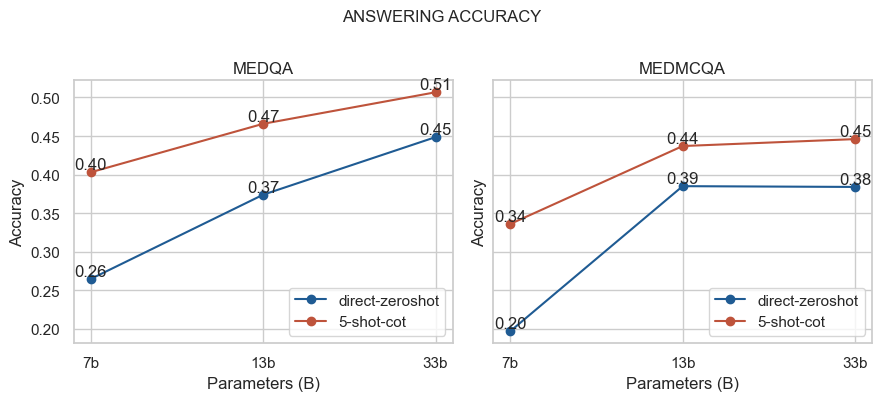